<a href="https://colab.research.google.com/github/poojagpta/releases/blob/master/m5_forecasting_project/walmart_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
pd.pandas.set_option("display.max_columns",None)
sns.set()
from tqdm.notebook import tqdm

In [ ]:
cal_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/m5-forecasting-accuracy/calendar.csv")
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/m5-forecasting-accuracy/sales_train_validation.csv")
price_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/m5-forecasting-accuracy/sell_prices.csv")

In [ ]:
df

id        item_id    dept_id   cat_id  \
0      HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
1      HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES   
2      HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES   
3      HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES   
4      HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES   
...                              ...            ...        ...      ...   
30485    FOODS_3_823_WI_3_validation    FOODS_3_823    FOODS_3    FOODS   
30486    FOODS_3_824_WI_3_validation    FOODS_3_824    FOODS_3    FOODS   
30487    FOODS_3_825_WI_3_validation    FOODS_3_825    FOODS_3    FOODS   
30488    FOODS_3_826_WI_3_validation    FOODS_3_826    FOODS_3    FOODS   
30489    FOODS_3_827_WI_3_validation    FOODS_3_827    FOODS_3    FOODS   

      store_id state_id  d_1  d_2  d_3  d_4  d_5  d_6  d_7  d_8  d_9  d_10  \
0         CA_1       CA    0    0    0    0    0    0    0    0    0     0   
1         CA_1       CA    0    0    0    0    0    0    0    0    0     0   
2         CA_1       CA    0    0    0    0    0    0    0    0    0     0   
3         CA_1       CA    0    0    0    0    0    0    0    0    0     0   
4         CA_1       CA    0    0    0    0    0    0    0    0    0     0   
...        ...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   
30485     WI_3       WI    0    0    2    2    0    3    1    4    1     0   
30486     WI_3       WI    0    0    0    0    0    5    0    1    1     3   
30487     WI_3       WI    0    6    0    2    2    4    1    8    5     2   
30488     WI_3       WI    0    0    0    0    0    0    0    0    0     0   
30489     WI_3       WI    0    0    0    0    0    0    0    0    0     0   

       d_11  d_12  d_13  d_14  d_15  d_16  d_17  d_18  d_19  d_20  d_21  d_22  \
0         0     0     0     0     0     0     0     0     0     0     0     0   
1         0     0     0     0     0     0     0     0     0     0     0     0   
2         0     0     0     0     0     0     0     0     0     0     0     0   
3         0     0     0     0     0     0     0     0     0     0     0     0   
4         0     0     0     0     0     0     0     0     0     0     0     0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
30485     0     3     4     4     0     0     1     0     1     1     7     7   
30486     1     1     0     4     2     0     1     2     1     1     0     0   
30487     7     5     3     5    20     8    10     3     3     4     7     2   
30488     0     0     0     0     0     0     0     0     0     0     0     0   
30489     0     0     0     0     0     0     0     0     0     0     0     0   

       d_23  d_24  d_25  d_26  d_27  d_28  d_29  d_30  d_31  d_32  d_33  d_34  \
0         0     0     0     0     0     0     0     0     0     0     0     0   
1         0     0     0     0     0     0     0     0     0     0     0     0   
2         0     0     0     0     0     0     0     0     0     0     0     0   
3         0     0     0     0     0     0     0     0     0     0     0     0   
4         0     0     0     0     0     0     0     0     0     0     0     0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
30485     3     6     3     3     7    12     4     2     7     5    12     5   
30486     0     0     3     1     1     1     2     0     1     0     1     1   
30487     3     5     6     3     4     1     2     5     1     2     2     2   
30488     0     0     0     0     0     0     0     0     0     0     0     0   
30489     0     0     0     0     0     0     0     0     0     0     0     0   

       d_35  d_36  d_37  d_38  d_39  d_40  d_41  d_42  d_43  d_44  d_45  d_46  \
0         0     0     0     0     0     0     0     0     0     0     0     0   
1         0     0     0     0     0     0     0     0     0     0     0     0   
2      

**Missing data**

In [ ]:
def missing_features(dataset):
    ##Make list of feature with missing value
    features_with_na = [features for features in dataset.columns if dataset[features].isnull().sum()>=1]

    ##2 - Feature name with % of missing values
    for feature in features_with_na:
        print(feature, np.round(dataset[feature].isnull().mean(),10), '% missing values')
    return features_with_na        

In [ ]:
missing_features(df)
missing_features(price_df)

[]

There is no missing features

Total Number of records

In [ ]:
df['id'].count()

30490

Numerical dataset

In [ ]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes!='O']
numerical_features

All d_ columns are numerical and all are datetime variables 

**Aggregate unit sales at each day for walmart data**

In [ ]:
model_df = pd.DataFrame(np.array([[c for c in df.columns if c.find("d_") == 0] ,\
                                    df[[c for c in df.columns if c.find("d_") == 0]].sum()]).transpose(),\
                           columns=['d','unit_sale'] ,index=[c for c in df.columns if c.find("d_") == 0])

In [ ]:
model_df

,d,unit_sale
d_1,d_1,32631
d_2,d_2,31749
d_3,d_3,23783
d_4,d_4,25412
d_5,d_5,19146
...,...,...
d_1909,d_1909,35343
d_1910,d_1910,35033
d_1911,d_1911,40517
d_1912,d_1912,48962


In [ ]:
model_df['unit_sale']=model_df['unit_sale'].astype(float)

**Histogram for numeric data**

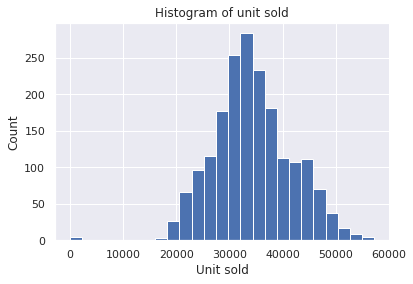

In [ ]:
model_df['unit_sale'].hist(bins=25)
plt.xlabel('Unit sold')
plt.ylabel('Count')
plt.title('Histogram of unit sold')
plt.show()

**Aggregate at store_id**

In [ ]:
model_agg_set = df[[c for c in df.columns if c.find('d_')==0]+['store_id']].groupby(by=['store_id']).sum().transpose()


In [ ]:
model_agg_set

store_id,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3
d_1,4337,3494,4739,1625,2556,3852,3030,2704,2256,4038
d_2,4155,3046,4827,1777,2687,3937,3006,2194,1922,4198
d_3,2816,2121,3785,1386,1822,2731,2225,1562,2018,3317
d_4,3051,2324,4232,1440,2258,2954,2169,1251,2522,3211
d_5,2630,1942,3817,1536,1694,2492,1726,2,1175,2132
...,...,...,...,...,...,...,...,...,...,...
d_1909,3722,3691,5235,2500,2901,3384,3315,3242,4194,3159
d_1910,3709,3303,5018,2458,2776,3446,3380,3324,4393,3226
d_1911,4387,4457,5623,2628,3022,3902,3691,3991,4988,3828
d_1912,5577,5884,7419,2954,3700,4483,4083,4772,5404,4686


**Merging both above dataset**

In [ ]:
for i in model_agg_set.columns:
    model_df[i] = list(model_agg_set[i])

**Merging dataset with calender and create timeseries dataset**

In [ ]:
model_df=model_df.merge(cal_df, on='d', how="inner")

In [ ]:
model_df['date'] = pd.to_datetime(model_df['date'])
model_df.set_index('date', inplace=True)

In [ ]:
model_df.dtypes

d                object
unit_sale       float64
CA_1              int64
CA_2              int64
CA_3              int64
CA_4              int64
TX_1              int64
TX_2              int64
TX_3              int64
WI_1              int64
WI_2              int64
WI_3              int64
wm_yr_wk          int64
weekday          object
wday              int64
month             int64
year              int64
event_name_1     object
event_type_1     object
event_name_2     object
event_type_2     object
snap_CA           int64
snap_TX           int64
snap_WI           int64
dtype: object

**Plot for total unit sales for all walmart stores**

Text(0, 0.5, 'Unit Sale')

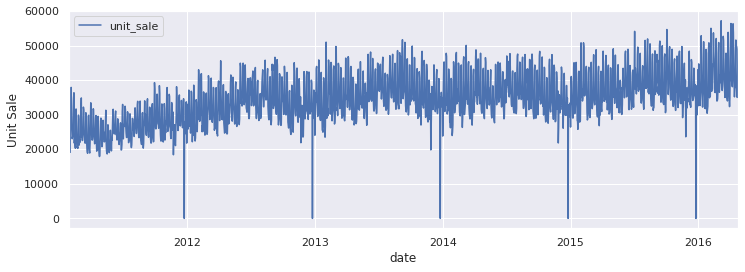

In [ ]:
ax = model_df[['unit_sale']].plot(figsize=(12,4))
ax.set_ylabel("Unit Sale")

In [ ]:
def plotseasonal(res, axes ):
    res.observed.plot(ax=axes[0], legend=False)
    axes[0].set_ylabel('Observed')
    res.trend.plot(ax=axes[1], legend=False)
    axes[1].set_ylabel('Trend')
    res.seasonal.plot(ax=axes[2], legend=False)
    axes[2].set_ylabel('Seasonal')
    res.resid.plot(ax=axes[3], legend=False)
    axes[3].set_ylabel('Residual')

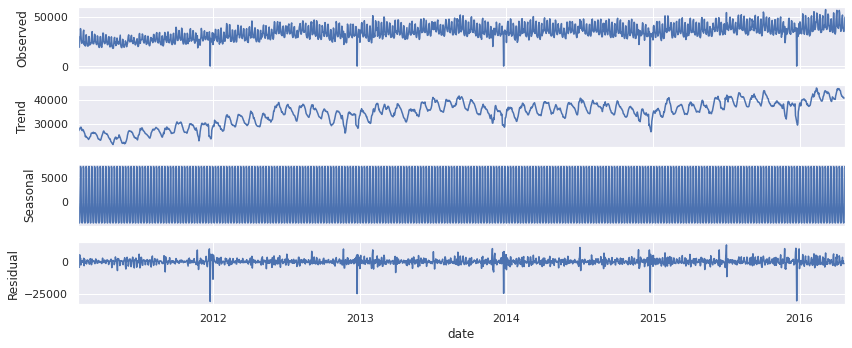

In [ ]:
dec = sm.tsa.seasonal_decompose(model_df[['unit_sale']])
fig, axes = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(12,5))

plotseasonal(dec, axes[:])

plt.tight_layout()
plt.show()

**Rolling Moving Average for 365 days for each store_id**

In [ ]:
state_id={'CA_1':[],'CA_2':[],'CA_3':[],'CA_4':[],'TX_1':[],'TX_2':[],'TX_3':[],'WI_1':[],'WI_2':[],'WI_3':[]}
Rolling_window = 364
mv_model = []
for i in state_id:
    state_id[i]=model_df[i].rolling(window=Rolling_window).mean()

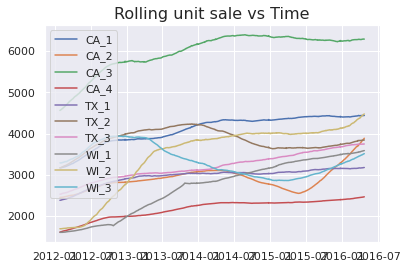

In [ ]:
plt.title("Rolling unit sale vs Time",fontsize=16 )
for i in state_id:
    plt.plot(state_id[i],label=i)
plt.legend()    


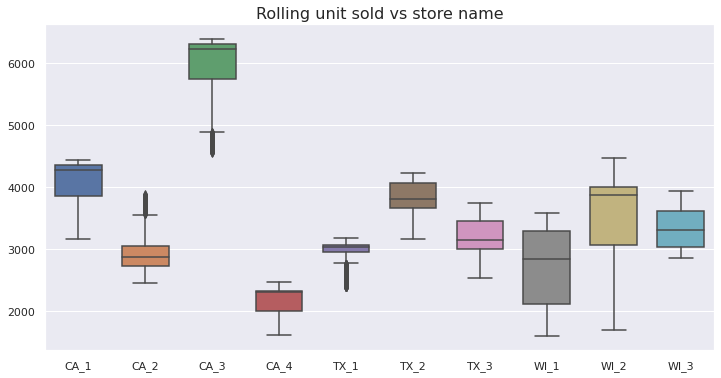

In [ ]:
figure, axis = plt.subplots(figsize=(12,6))
g =sns.boxplot(data=list(state_id.values()), width=.7)
plt.title('Rolling unit sold vs store name', fontsize=16)

xvalues =list(state_id.keys())
plt.xticks(np.arange(10), xvalues)

plt.show()

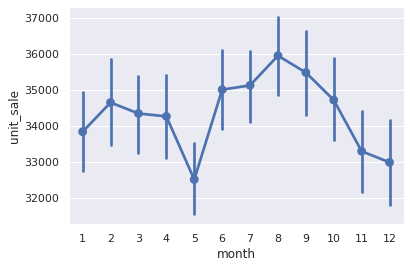

In [ ]:
sns.pointplot(x=model_df.month,y='unit_sale', data=model_df)

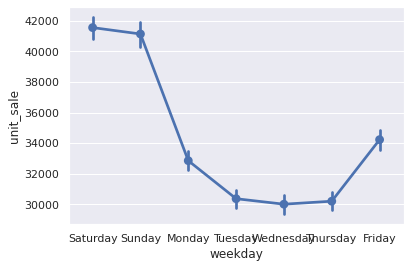

In [ ]:
sns.pointplot(x=model_df.weekday,y='unit_sale', data=model_df)

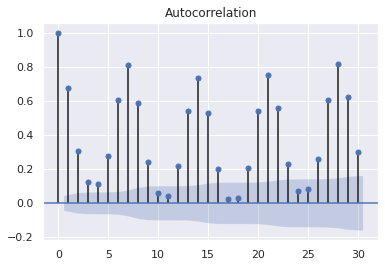

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf


plot_acf(model_df['unit_sale'], lags = 30);